## Testing training results of the Deep QN model

### 1. Importing libraries and saved results

In [1]:
import os
import sys

# change working directory
current_dir = os.getcwd() 
print(f"Current Working Directory: {current_dir}")
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
os.chdir(parent_dir)
current_dir = os.getcwd()
print(f"Current Working Directory: {current_dir}")
#We need to be in the main directory that contains tests, models, etc folders

Current Working Directory: /mnt/c/Users/ASUS/OneDrive - SISSA/study/research/neural theory/data_science_finance/deepQN_trading/test_notebooks
Current Working Directory: /mnt/c/Users/ASUS/OneDrive - SISSA/study/research/neural theory/data_science_finance/deepQN_trading


In [2]:
import pickle
from matplotlib import pyplot as plt

In [3]:
with open('dqn_trading_results.pkl', 'rb') as f:
    results = pickle.load(f)
    DQN_test_profit = results['DQN_test_profit']
    DQN_training_profit = results['DQN_training_profit']
    train_dates = results['train_dates']
    test_dates = results['test_dates']
    Q=results['Qmodel']  # Assuming Q is also stored in the pickle file
    q_values_over_epochs = results['q_values_over_epochs']
    profit_epochs = results['DQN_profit_epochs']

### 2. Analyzing training loss

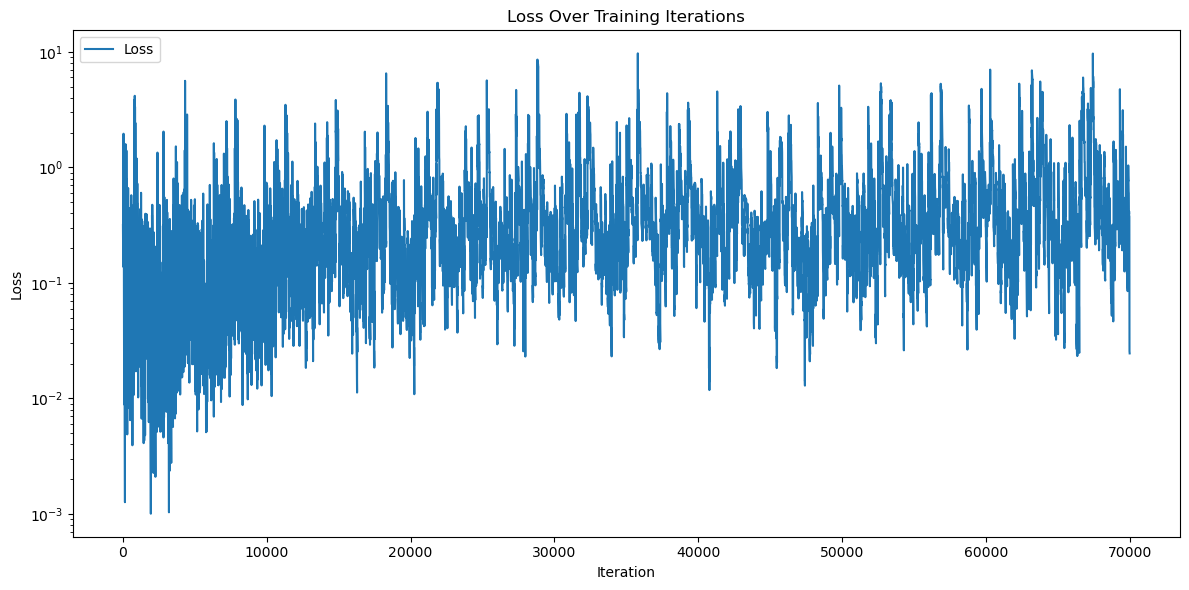

In [4]:
# Plotting the loss table
plt.figure(figsize=(12, 6))
plt.yscale('log')
plt.plot(Q.loss_table, label='Loss')
plt.title('Loss Over Training Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

### 3. Analyzing net profit after each epoch

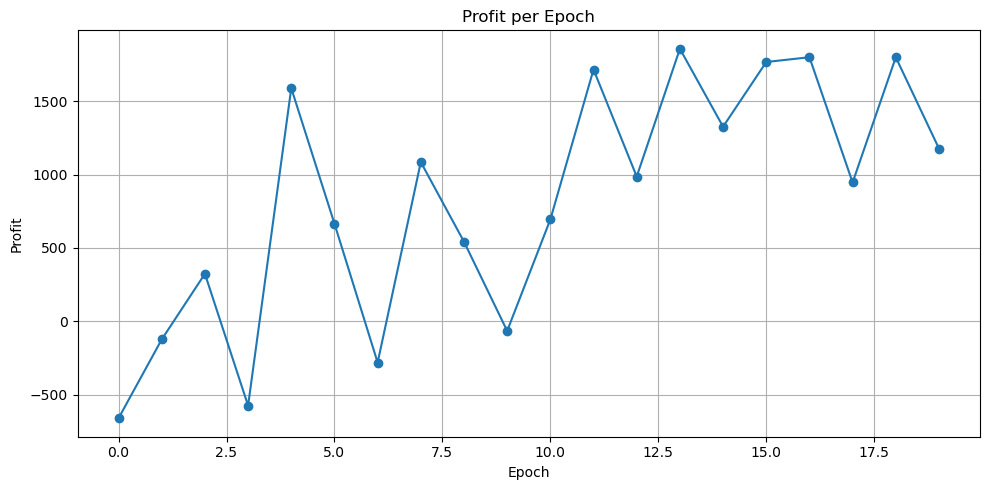

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(profit_epochs, marker='o')
plt.title('Profit per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

### 4. Checking evolution of Q values evoer training

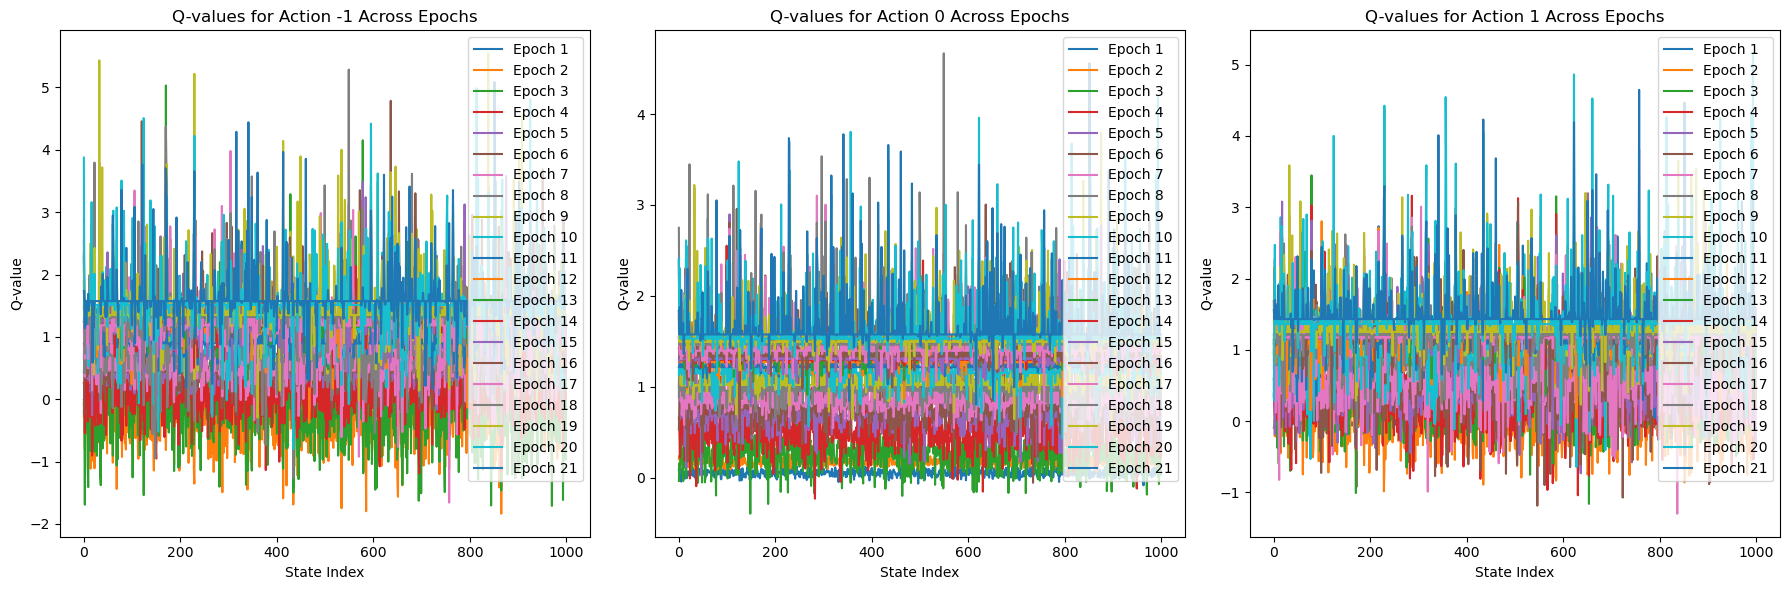

In [6]:
# Plot the Q-values for each action across epochs
plt.figure(figsize=(18, 6))

# Plot for action -1
plt.subplot(1, 3, 1)
for epoch, epoch_values in enumerate(q_values_over_epochs[-1]):
    plt.plot(range(len(epoch_values)), epoch_values, label=f'Epoch {epoch + 1}')
plt.title('Q-values for Action -1 Across Epochs')
plt.xlabel('State Index')
plt.ylabel('Q-value')
plt.legend()

# Plot for action 0
plt.subplot(1, 3, 2)
for epoch, epoch_values in enumerate(q_values_over_epochs[0]):
    plt.plot(range(len(epoch_values)), epoch_values, label=f'Epoch {epoch + 1}')
plt.title('Q-values for Action 0 Across Epochs')
plt.xlabel('State Index')
plt.ylabel('Q-value')
plt.legend()

# Plot for action 1
plt.subplot(1, 3, 3)
for epoch, epoch_values in enumerate(q_values_over_epochs[1]):
    plt.plot(range(len(epoch_values)), epoch_values, label=f'Epoch {epoch + 1}')
plt.title('Q-values for Action 1 Across Epochs')
plt.xlabel('State Index')
plt.ylabel('Q-value')
plt.legend()

plt.tight_layout()
plt.show()

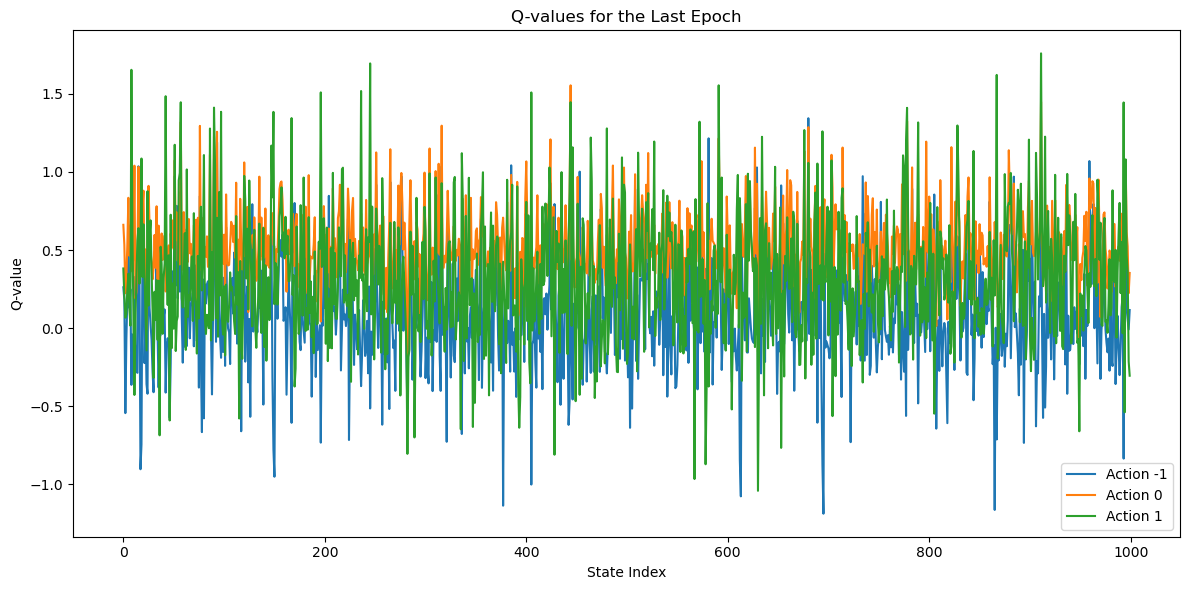

In [7]:
# Plot the Q-values for the last epoch
plt.figure(figsize=(12, 6))

epoch=3
for action in [-1, 0, 1]:
    plt.plot(range(len(q_values_over_epochs[action][epoch])), q_values_over_epochs[action][epoch], label=f'Action {action}')

plt.title('Q-values for the Last Epoch')
plt.xlabel('State Index')
plt.ylabel('Q-value')
plt.legend()
plt.tight_layout()
plt.show()